                                                        MODEL BUIDLING

In [187]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
pd.set_option('Display.max_columns' , None)

In [188]:
data = load_breast_cancer()
df = pd.DataFrame(data = data['data'] , columns = data['feature_names'])
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df.copy()
y = data['target']

x_train , x_test , y_train , y_test  = train_test_split( x , y , test_size = 0.25 , random_state = 42)

In [190]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [191]:
#getting all the parameters of the model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [192]:
pred = dt.predict(x_test)

In [193]:
dt.predict_proba(x_test)
#used to indicate the probability of the outcomes 
#i.e in this case for the first row of the test data , predicted op is (o with 1/1 probability) & ( 1 with 0 out of 1 probability)
#the probability is in 0 & 1 coz the tree is has no depth defined and will split until it find a leaf node .
#but if we define the max depth as 4 . Then the probability becomes slightly unsure since we dont let it split to a leaf node .

array([[0.00816327, 0.99183673],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [0.        , 1.        ],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [0.00816327, 0.99183673],
       [1.        , 0.        ],
       [0.

In [194]:
#checking the accuracy using a performance metrics

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score
accuracy_score(y_test , pred)

0.951048951048951

In [195]:
confusion_matrix(y_test , pred)

array([[51,  3],
       [ 4, 85]])

This matrix is a 2x2 matrix, which is typically used for binary classification problems. Here’s how to interpret it:

True Positives (TP): These are the cases in which we predicted yes (they have the condition), and they do have the condition. In your case, this value is 51.

True Negatives (TN): We predicted no, and they don’t have the condition. In your case, this value is 85.

False Positives (FP): We predicted yes, but they don’t actually have the condition. (Also known as a “Type I error.”) In your case, this value is 3.

False Negatives (FN): We predicted no, but they actually do have the condition. (Also known as a “Type II error.”) In your case, this value is 4.

From these values, we can calculate further metrics such as accuracy, precision, recall, and F1 score:

Accuracy: Overall, how often is the classifier correct? It’s calculated as (TP+TN)/total = (51+85)/143 = 0.951 or 95.1%.

Precision: When it predicts yes, how often is it correct? It’s calculated as TP/predicted yes = 51/(51+3) = 0.944 or 94.4%.

Recall (Sensitivity): When it’s actually yes, how often does it predict yes? It’s calculated as TP/actual yes = 51/(51+4) = 0.927 or 92.7%.

F1 Score: This is a weighted average of the true positive rate (recall) and precision, where an F1 score reaches its best value at 1 and worst score at 0. It’s calculated as 2*(Recall * Precision) / (Recall + Precision) = 2*(0.927*0.944)/(0.927+0.944) = 0.935 or 93.5%.

These metrics provide a comprehensive view of how well your model is performing. Remember, depending on the problem at hand, you might want to optimize for a specific metric over others. For example, in a medical diagnosis scenario, you might want to optimize for recall as false negatives (missing an actual positive case) could be significantly more harmful than false positives.

In [196]:
precision_score(y_test , pred)

0.9659090909090909

In [197]:
#we will now see a full classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test , pred , target_names = ['malignant' , 'benign']))

              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [198]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71010827, 0.        , 0.        ,
       0.013032  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01737208, 0.00684355, 0.        ,
       0.08952349, 0.11783988, 0.        , 0.03522339, 0.01005736,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [199]:
#checking which feature is more important 

feature_importance = pd.DataFrame(dt.feature_importances_ , index = x.columns).sort_values(by = 0 ,  ascending = False)
feature_importance[feature_importance != 0]

,0
mean concave points,0.710108
worst texture,0.117840
worst radius,0.089523
worst area,0.035223
concave points error,0.017372
radius error,0.013032
worst smoothness,0.010057
symmetry error,0.006844
mean radius,NaN
concavity error,NaN


<Axes: >

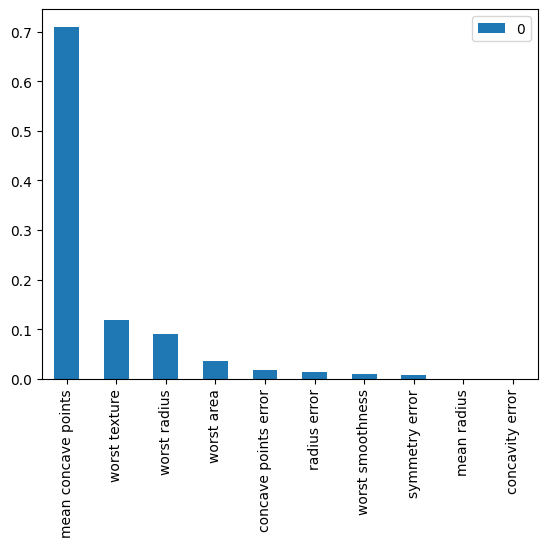

In [200]:
#visualizing it 

feature_importance.head(10).plot(kind = 'bar')

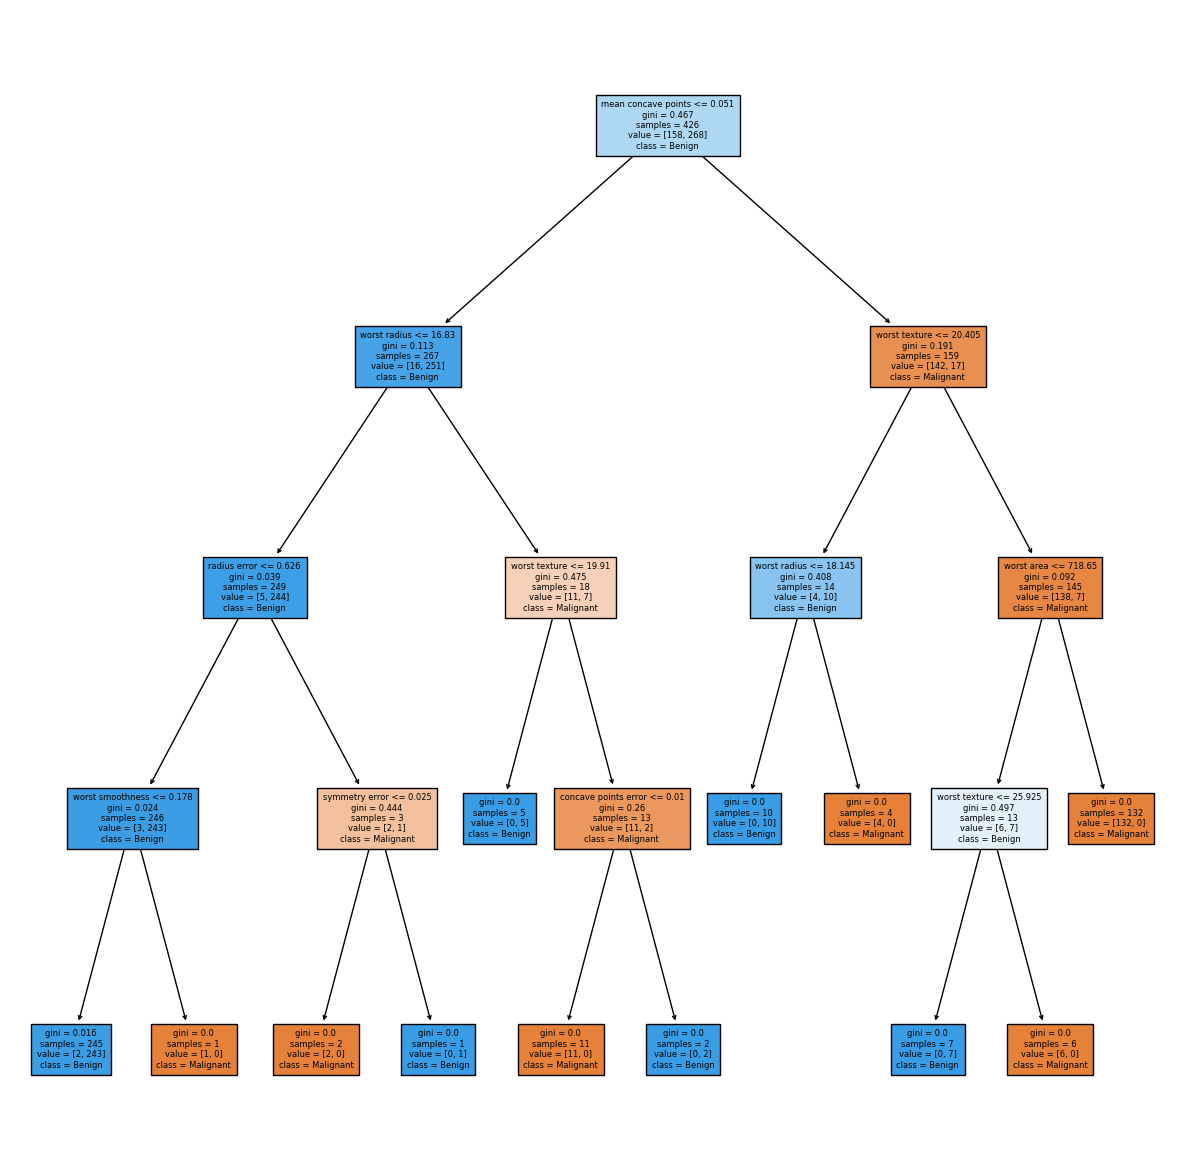

In [207]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
tree.plot_tree(dt , feature_names = x.columns , class_names = { 0 : 'Malignant' , 1: 'Benign'} , fontsize = 6,  filled = True)
plt.show()